# An Analysis of the Health of The Saguaro Population at Desert Botanical Garden

<img src="images/Saguaro.jpg">  <img src="images/Saguaro map.png">

---

## Introduction
* Desert Botanical Garden Saguaro Inventory
* Research questions

## Import data
* Mortality_per_year_ready_for_analysis.csv contains the count of how many saguaros were lost in each year of interest.
* Nights_above_90_ready_for_analysis.csv contains the count of how many days had a low >= 90 F for each year.

## Analyze saguaro mortality patterns
* Bar plot of saguaro losses each year
* Line plot of saguaro losses versus nights above 90

## Analyze saguaro growth rate patterns
* Bar plot...
* Line plot...

## Test the hypothesis that...

## Conclusions and Future Work

In [14]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Import data
mortality_per_year_df = pd.read_csv("../Data ready for analyses/Mortality_per_year_ready_for_analysis.csv")
growth_rates_df = pd.read_csv("../Data ready for analyses/GrowthRates_ready_for_analysis.csv")
nights_above_90_df = pd.read_csv("../Data ready for analyses/Nights_above_90_ready_for_analysis.csv")
precip_df = pd.read_csv("../Data ready for analyses/precip_ready_for_analysis.csv")

## Analyze Saguaro Mortality Patterns (Veronica is working on this)

In [16]:
# View dataset
mortality_per_year_df

,Unnamed: 0,Year,Mortality Count
0,0,2013,7
1,1,2014,5
2,2,2015,21
3,3,2016,8
4,4,2017,19
5,5,2018,13
6,6,2019,18
7,7,2020,15


In [22]:
# Drop first column
mortality_per_year_df = mortality_per_year_df[["Year", "Mortality Count"]]

mortality_per_year_df

,Year,Mortality Count
0,2013,7
1,2014,5
2,2015,21
3,2016,8
4,2017,19
5,2018,13
6,2019,18
7,2020,15


In [33]:
# Calculate mean mortality
mean_mortality = mortality_per_year_df["Mortality Count"].mean()

mean_mortality

13.25

Text(0, 0.5, 'Saguaros Lost')

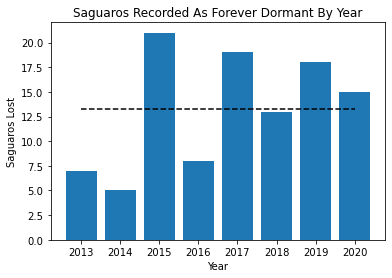

In [40]:
# Bar plot of saguaros recorded as "Forever Dormant" each year.
years = ["2013", "2014", "2015", "2016", "2017", "2020"]
plt.bar(mortality_per_year_df["Year"], mortality_per_year_df["Mortality Count"])
plt.hlines(mean_mortality, 2013, 2020, colors = "k", linestyles = "dashed", label = "13.25", )
plt.title("Saguaros Recorded As Forever Dormant By Year")
plt.xlabel("Year")
plt.ylabel("Saguaros Lost")

In [ ]:
# Line plot of saguaros lost versus nights above 90
x_axis_data = np.arange(1,13,1)
plt.plot(x_axis_data, points)
plt.legend(loc="lower right")
plt.hlines(0, 0, 10, alpha=0.25)
plt.show()

# Analyze Saguaro Growth Rate Patterns

In [ ]:
# Bar plot?


In [ ]:
# Line plot?


# Test The Hypothesis That...

In [ ]:
# T-test?


# Conclusions and Future Work